In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import isfile, join
from os import listdir
import pandas as pd
import random
import skimage
import imutils
from PIL import ImageFilter 

from PIL import Image
from IPython.display import clear_output


%run ./variables.ipynb

DATASET_PATH_ROOT = "../../../../nvme-storage"
DATASET_PATH_REGION = "/RA/tmp"
path = "../../../../nvme-storage/RA/tmp/RA_AAMB_6464.png"



In [2]:
def rot_image(path):
    img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    #mask = np.zeros_like(img)-1
    
    #rotation mask et image
    mask_rot = np.ones(img.shape,np.uint8)
    angle = random.randint(0,90)
    img_rot = imutils.rotate_bound(img, angle)
    mask_rot = imutils.rotate_bound(mask_rot, angle)
    
    #erosion mask
    mask_erod =np.zeros_like(img_rot,np.uint8)
    kernel_size = 5
    kernel = np.ones((kernel_size,kernel_size),np.uint8)
    mask_erod = cv2.erode(mask_rot,kernel,iterations = 1)
    
    #bounding box
    bb1 = (np.asmatrix(np.where(mask_rot==1))[0,0],np.asmatrix(np.where(mask_rot==1))[1,0])
    bb2 = (np.asmatrix(np.where(mask_rot==1))[0,-1],np.asmatrix(np.where(mask_rot==1))[1,-1])
    
    #pixels erodé
    erod = (mask_rot - mask_erod)*255
    
    #erod_img[erod==255] = img_rot[erod==255]

    a=[]
    a = img_rot[erod!=0]
    a = int(np.mean(a))
    img_rot[mask_erod == 0] = a
    display(Image.fromarray(img_rot))


    return(img_rot, mask_rot, mask_erod, a)

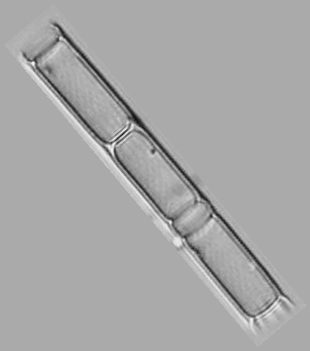

In [3]:
img_rot, mask_rot, mask_erod, a = rot_image(path)

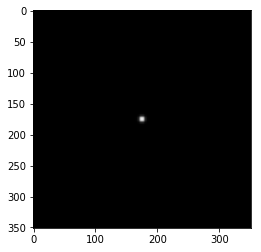

ValueError: operands could not be broadcast together with shapes (351,310) (351,351) (351,310) 

In [11]:
def GaussImage(img_rot,b=1):
    N = np.max(img_rot.shape)
    t = np.linspace(-b,b,N).reshape(N,1)
    return np.exp(-t**2-(t.T)**2)

def ImTranslate(h,tau):
    M, N = h.shape
    v = np.zeros((M,N))
    indrow = ((tau[0]+np.arange(M))%M).reshape(M,1)
    indcol = ((tau[1]+np.arange(N))%N).reshape(1,N)
    v[indrow,indcol] = h
    return v

def DSN(h,n, img_rot):
    M, N = img_rot.shape
    u = np.zeros((M,N))
    for k in range(n):
        tau0 = np.random.randint(M)
        tau1 = np.random.randint(N)
        u += ImTranslate(h,[tau0,tau1])
    return u

h2 = GaussImage(img_rot,40)
plt.imshow(h2,cmap='gray')
plt.show()
for n in [10,100,1000]:
    u = DSN(h2,n,img_rot)
    plt.imshow(u,cmap='gray')
    plt.show()


In [9]:
plt.imshow(img_rot + u)

ValueError: operands could not be broadcast together with shapes (351,310) (351,351) 

In [15]:
#os.mkdir('/mnt/nvme-storage/souhila/BR_M/AAMB')



In [16]:

DATASET_PATH = join(DATASET_PATH_ROOT + DATASET_PATH_REGION)
images = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH , f))]
classeur = pd.read_excel("/mnt/nvme-storage/souhila/Info_BR_M_color.xlsx")
dico = dict(classeur)
#classeur.columns = ['Codes', 'inventaire _M_BR',"RA"]
for l in classeur["Codes"]:
    os.mkdir(join('/mnt/nvme-storage/souhila/BR_M/'+l))


FileExistsError: [Errno 17] File exists: '/mnt/nvme-storage/souhila/BR_M/AAMB'

In [17]:
#creer un dossier avec simplement les taxons qui nous interesse

In [18]:
DATASET_PATH = join(DATASET_PATH_ROOT + DATASET_PATH_REGION)
images = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH , f))]

In [19]:
#import des images
def rot_image(path):
    
    
    img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    #mask = np.zeros_like(img)-1
    
    #rotation mask et image
    mask_rot = np.ones(img.shape,np.uint8)
    angle = random.randint(0,90)
    img_rot = imutils.rotate_bound(img, angle)
    mask_rot = imutils.rotate_bound(mask_rot, angle)
    
    #erosion mask
    mask_erod =np.zeros_like(img_rot,np.uint8)
    kernel_size = 5
    kernel = np.ones((kernel_size,kernel_size),np.uint8)
    mask_erod = cv2.erode(mask_rot,kernel,iterations = 1)
    
    #bounding box
    bb1 = (np.asmatrix(np.where(mask_rot==1))[0,0],np.asmatrix(np.where(mask_rot==1))[1,0])
    bb2 = (np.asmatrix(np.where(mask_rot==1))[0,-1],np.asmatrix(np.where(mask_rot==1))[1,-1])
    
    #pixels erodé
    erod = (mask_rot - mask_erod)*255
    
    #erod_img[erod==255] = img_rot[erod==255]

    a=[]
    a = img_rot[erod!=0]
    a=int(np.mean(a))
    w, h = img_rot.shape
    img_rot[0,:],img_rot[w-1,:],img_rot[:,0],img_rot[:,h-1] = a, a, a, a
    display(Image.fromarray(img_rot))


    return(img_rot, mask_rot, mask_erod, a)

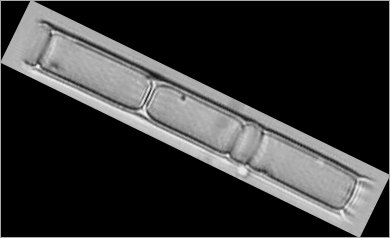

AttributeError: 'numpy.ndarray' object has no attribute 'filter'

In [20]:
img_rot, mask_rot, mask_erod, b = rot_image(path)
#a = img_rot[erod!=0]
blurred_image = img_rot.filter(ImageFilter.GaussianBlur(50))  
#plt.imshow(blurred_image)

In [21]:
def export_MBR(img, path_export_data):
    cv2.imwrite('../../../../nvme-storage',img)

In [5]:
#creer un flou
def floutage(img,b=170):
    h,w = img.shape
    l_c = np.random.choice(0, 1)
    n_l_c = np.random.choice(0,img.shape[l_c])
    kernel = np.ones(h,w)
    if l_c == 0:
         = n_l_c
        t = np.linspace(-b,b,h).reshape(h,1)
        print(t.shape)
        kernel
    else:
        kernel = 
        
def GaussImage(img_rot,b=1):
    N = np.max(img_rot.shape)
    t = np.linspace(-b,b,N).reshape(N,1)
    print(t.shape)
    return np.exp(-t**2-(t.T)**2)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

70 400 169


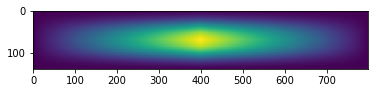

In [51]:
from scipy import signal
from scipy import misc
img = cv2.imread(path,cv2.COLOR_BGR2GRAY)

h,w = img.shape
print(h,w,b)
t=np.repeat(np.linspace(-1,1,h),w).reshape(h,w)
#plt.imshow(np.exp(-t**2-(t.T)**2))
kernel = np.ones((h,w))
ker = kernel*np.exp(-t**2-(t)**2)
plt.imshow(kernel*np.exp(-t**2-(t)**2))
img_convol = signal.convolve2d(img,ker)
plt.imshow(img_convol)

In [22]:
import cv2

image = cv2.imread(path,cv2.COLOR_BGR2GRAY)
gaussian_3 = cv2.GaussianBlur(image, (9,9), 10.0)
unsharp_image = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
cv2.imwrite("image.pn", unsharp_image)


True

In [ ]:
#bounding box
bb1 = (np.asmatrix(np.where(mask_rot==1))[0,0],np.asmatrix(np.where(mask_rot==1))[1,0])
bb2 = (np.asmatrix(np.where(mask_rot==1))[0,-1],np.asmatrix(np.where(mask_rot==1))[1,-1])


'''mask_rot = imutils.rotate_bound(mask_rot, angle)
#
#mask_rot[mask_rot == 0] = -1
mask_erod =np.zeros_like(img_rot,np.uint8)
#showImg(img_rot)
#showImg(mask_rot)'''

kernel_size = 5
kernel = np.ones((kernel_size,kernel_size),np.uint8)
mask_erod = cv2.erode(mask_rot,kernel,iterations = 1)
#showImg(mask_erod)

erod = (mask_rot - mask_erod)*255
print((erod.shape , mask_rot.shape , mask_erod.shape))

'''
mask_rot = avec des 1 la ou il y a imaage et 0 dans fond
mask_erod = erosion du mask _rot
erod = 1 pour erosion 0 le reste de l'image
erod_img

'''


erod_img = np.zeros_like(img_rot)
erod_img[erod==255] = img_rot[erod==255]
#showImg(erod_img)

a=[]
a = erod_img[erod_img!=0]
a=int(np.mean(a))
w, h = img_rot.shape
img_rot[0,:],img_rot[w-1,:],img_rot[:,0],img_rot[:,h-1] = a, a, a, a
showImg(img_rot)










def img_filling_imagette(img_rot,mask_rot, sigma=10e3, verbose=True):
    final_img = img_rot.copy()
    acc, accw = np.zeros_like(final_img).astype(np.float32), np.zeros_like(final_img).astype(np.float32)
    conts, hi = cv2.findContours(mask_rot, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
   
    # Getting indices
    h = final_img.shape[0]
    w = final_img.shape[1]
    
    #if not hasattr(img_filling, 'W'):
    indices = np.indices((h*2,w*2))
    xMap = indices[0]
    yMap = indices[1]
    d2 = np.square(xMap - w) + np.square(yMap - h)
    img_filling_imagette.W = np.exp(-d2/sigma)
    img_filling_imagette.W[img_filling_imagette.W<1e-10] = 1e-10
    
    # Looping
    i = 0
    
    know = np.concatenate(np.concatenate(conts))
    pl = (np.array((np.repeat(0,w),np.arange(0,w)),np.uint32).T).reshape([w,2])
    dl = (np.array((np.repeat(h-1,w),np.arange(0,w)),np.uint32).T).reshape([w,2])
    pc = (np.array((np.arange(0,h),np.repeat(0,h)),np.uint32).T).reshape([h,2])
    dc = (np.array((np.arange(0,h),np.repeat(w-1,h)),np.uint32).T).reshape([h,2])
    known = np.concatenate((know,pl,dl,pc,dc))
    
    #print(known.shape)
    for kp in known:
        # Counter
        if verbose and i%2000==0:
            print(i, "/", len(known))
            i += 1
        # Init
        xkp, ykp = kp[0], kp[1]
        val = final_img[xkp, ykp]
        # FILLING
        #print(xkp, ykp, w, h, 2*h-xkp )

        w = img_filling_imagette.W[ h-xkp : 2*h-xkp , w-ykp : 2*w-ykp ]
        #print(kp , val)
        acc += w*val
        #print(acc)
        accw += w
        #print(accw)
    acc = np.divide(acc, accw)
    print(acc)

    acc_img = acc.astype(np.uint8)
    final_img[mask_rot==0] = acc_img[mask_rot==0]
    return final_img


final_img = img_filling_imagette(img_rot,mask_rot, sigma=10e3, verbose=False)


import random
path = "../../../../nvme-storage/RA/tmp/RA_AAMB_6464.png"

img = cv2.imread(path)
angle = np.random.choice(0, 90)
showImg(img)
img_rot = img.
square_size = np.max(image.shape)
h, w = image.shape
delta_w = square_size - w
delta_h = square_size - h
#top, bottom = delta_h//2, delta_h-(delta_h//2)
#left, right = delta_w//2, delta_w-(delta_w//2)
#square_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_REPLICATE)
square_image = transform.rotate(image, 45, resize=True, cval=1, mode ='constant') 
img_int = cv2.borderInterpolate(p, len, borderType)


pl = (np.array((np.repeat(0,h),np.arange(0,h)),np.uint32).T).reshape([h,2])
dl = (np.array((np.repeat(w-1,h),np.arange(0,h)),np.uint32).T).reshape([h,2])
pc = (np.array((np.arange(0,w),np.repeat(0,w)),np.uint32).T).reshape([w,2])
dc = (np.array((np.arange(0,w),np.repeat(h-1,w)),np.uint32).T).reshape([w,2])


bords = np.concatenate((pl,dl,pc,dc))
for bord in bords:
    #print (bord[0], bord[1])



final_img = img_rot.copy()
acc, accw = np.zeros_like(final_img).astype(np.float32), np.zeros_like(final_img).astype(np.float32)
conts, h = cv2.findContours(mask_rot, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Getting indices
height=final_img.shape[0]
width=final_img.shape[1]
if not hasattr(img_filling, 'W'):
    indices = np.indices((height*2,width*2))
    xMap = indices[0]
    yMap = indices[1]
    d2 = np.square(xMap - width) + np.square(yMap - height)
    img_filling.W = np.exp(-d2/sigma)
    img_filling.W[img_filling.W<1e-10] = 1e-10
# Looping
i = 0

know = np.concatenate(conts)
pl = (np.array((np.repeat(0,width),np.arange(0,width)),np.uint32).T).reshape([width,2])
dl = (np.array((np.repeat(height-1,width),np.arange(0,width)),np.uint32).T).reshape([width,2])
pc = (np.array((np.arange(0,height),np.repeat(0,height)),np.uint32).T).reshape([height,2])
dc = (np.array((np.arange(0,height),np.repeat(width-1,height)),np.uint32).T).reshape([height,2])
known = np.concatenate((know,pl,dl,pc,dc))


import random
import skimage
import imutils
path = "../../../../nvme-storage/RA/tmp/RA_AAMB_6464.png"



img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
#mask = np.zeros_like(img)-1
mask_rot = np.ones(img.shape,np.uint8)
angle = random.randint(0,90)
#img_rot = skimage.transform.rotate(img, angle, resize=True, cval=-1, mode ='constant')
img_rot = imutils.rotate_bound(img, angle)
mask_rot = imutils.rotate_bound(mask_rot, angle)
mask_erod =np.zeros_like(img_rot,np.uint8)


#bounding boxnp.random.choice(0, 90)

bb1 = (np.asmatrix(np.where(mask_rot==1))[0,0],np.asmatrix(np.where(mask_rot==1))[1,0])
bb2 = (np.asmatrix(np.where(mask_rot==1))[0,-1],np.asmatrix(np.where(mask_rot==1))[1,-1])


'''mask_rot = imutils.rotate_bound(mask_rot, angle)
#
#mask_rot[mask_rot == 0] = -1
mask_erod =np.zeros_like(img_rot,np.uint8)
#showImg(img_rot)
#showImg(mask_rot)'''

kernel_size = 5
kernel = np.ones((kernel_size,kernel_size),np.uint8)
mask_erod = cv2.erode(mask_rot,kernel,iterations = 1)
#showImg(mask_erod)

erod = (mask_rot - mask_erod)*255
print((erod.shape , mask_rot.shape , mask_erod.shape))

'''
mask_rot = avec des 1 la ou il y a imaage et 0 dans fond
mask_erod = erosion du mask _rot
erod = 1 pour erosion 0 le reste de l'image
erod_img

'''
erod_img = np.zeros_like(img_rot)
erod_img[erod==255] = img_rot[erod==255]
#showImg(erod_img)

a=[]
a = erod_img[erod_img!=0]
a=int(np.mean(a))
w, h = img_rot.shape
img_rot[0,:],img_rot[w-1,:],img_rot[:,0],img_rot[:,h-1] = a, a, a, a
showImg(img_rot)
showImg(erod_img)

blur = cv2.bilateralFilter(erod_img,9,75,75)

square_size = np.max(img_rot.shape)
h, w = img.shape
delta_w = square_size - w
delta_h = square_size - h
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)
sd = cv2.GaussianBlur(img, (5,25),cv2.BORDER_DEFAULT)
p2 = cv2.copyMakeBorder(sd, top, bottom, left, right, cv2.BORDER_REPLICATE)

p = cv2.copyMakeBorder(sd, top, bottom, left, right, cv2.BORDER_REPLICATE)
showImg(sd)


import numpy as np
import matplotlib.pyplot as plt
import cv2
fond = np.zeros_like(img_rot,np.uint8)
x = random.randint(0,h)
y = random.randint(0,w)
fond = cv2.circle(fond, (x, y), radius, color, thickness) 



def ImTranslate(h,tau):
    M, N = h.shape
    v = np.zeros((M,N))
    indrow = ((tau[0]+np.arange(M))%M).reshape(M,1)
    indcol = ((tau[1]+np.arange(N))%N).reshape(1,N)
    v[indrow,indcol] = h
    return v

def DSN(h,n):
    M, N = h.shape
    u = np.zeros((M,N))
    for k in range(n):
        tau0 = np.random.randint(M)
        tau1 = np.random.randint(N)
        u += ImTranslate(h,[tau0,tau1])
    return u

def GaussImage(img_rot,b):
    N = np.max(img_rot.shape)
    t = np.linspace(-b,b,N).reshape(N,1)
    print(t.shape)
    return np.exp(-t**2-(t.T)**2)

h2 = GaussImage(img_rot,10)
plt.imshow(h2,cmap='gray')
plt.show()

for n in [10,100,1000]:
    u = DSN(h2,100)
    plt.imshow(u,cmap='gray') 
    plt.show()
fond = np.zeros_like(img_rot)+a
fond = u[0:fond.shape[0],0:fond.shape[1]]

fond.shape
showImg(fond * 100 + img_rot)

fond_moyen = np.zeros_like(mask_rot)
fond_moyen[mask_rot == 0] = a
img_rot_erod = img_rot-erod_img
fond_moyen[img_rot_erod == 0] = a
showImg(fond_moyen + img_rot_erod + fond*int(a/2))
cv2.imwrite('img.png',fond_moyen + img_rot_erod + fond*int(a/2))

In [1]:
import cv2 # Import relevant libraries 
import cv 
import numpy as np 

img = cv2.imread('cameraman.png', 0) # Read in image 

height = img.shape[0] # Get the dimensions 
width = img.shape[1] 

# Define mask 
mask = 255*np.ones(img.shape, dtype='uint8') 

# Draw circle at x = 100, y = 70 of radius 25 and fill this in with 0 
cv2.circle(mask, (100, 70), 25, 0, -1)  

# Apply distance transform to mask 
out = cv2.distanceTransform(mask, cv.CV_DIST_L2, 3) 

# Define scale factor 
scale_factor = 10 

# Create output image that is the same as the original 
filtered = img.copy() 

# Create floating point copy for precision 
img_float = img.copy().astype('float') 

# Number of channels 
if len(img_float.shape) == 3: 
    num_chan = img_float.shape[2] 
else: 
    # If there is a single channel, make the images 3D with a singleton 
    # dimension to allow for loop to work properly 
    num_chan = 1 
    img_float = img_float[:,:,None] 
    filtered = filtered[:,:,None] 

# For each pixel in the input... 
for y in range(height): 
    for x in range(width): 

    # If distance transform is 0, skip 
    if out[y,x] == 0.0: 
     continue 

    # Calculate M = d/S 
    mask_val = np.ceil(out[y,x]/scale_factor) 

    # If M is too small, set the mask size to the smallest possible value 
    if mask_val <= 3: 
     mask_val = 3 

    # Get beginning and ending x and y coordinates for neighbourhood 
    # and ensure they are within bounds 
    beginx = x-int(mask_val/2) 
    if beginx < 0: 
     beginx = 0 

    beginy = y-int(mask_val/2) 
    if beginy < 0: 
     beginy = 0 

    endx = x+int(mask_val/2) 
    if endx >= width: 
     endx = width-1 

    endy = y+int(mask_val/2) 
    if endy >= height: 
     endy = height-1 

    # Get the coordinates of where we need to grab pixels 
    xvals = np.arange(beginx, endx+1) 
    yvals = np.arange(beginy, endy+1) 
    (col_neigh,row_neigh) = np.meshgrid(xvals, yvals) 
    col_neigh = col_neigh.astype('int') 
    row_neigh = row_neigh.astype('int') 

    # Get the pixels now 
    # For each channel, do the foveation 
    for ii in range(num_chan): 
     chan = img_float[:,:,ii] 
     pix = chan[row_neigh, col_neigh].ravel() 

     # Calculate the average and set it to be the output 
     filtered[y,x,ii] = int(np.mean(pix)) 

# Remove singleton dimension if required for display and saving 
if num_chan == 1: 
    filtered = filtered[:,:,0] 

# Show the image 
cv2.imshow('Output', filtered) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

IndentationError: expected an indented block (<ipython-input-1-f1e8457bf227>, line 43)